In [0]:
from google.colab import drive 
 
drive.mount('/content/gdrive')
#!unzip "/content/gdrive/My Drive/miscellaneous/data1-2.h5.zip"

import tensorflow as tf
import h5py
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors

def loadDataH5():
  
  with h5py.File('data1.h5','r') as hf:
    trainX = np.array(hf.get('trainX')) 
    trainY = np.array(hf.get('trainY')) 
    valX = np.array(hf.get('valX')) 
    valY = np.array(hf.get('valY')) 
    print (trainX.shape,trainY.shape) 
    print (valX.shape,valY.shape)
    
    return trainX, trainY, valX, valY
  
def random_forest():
  
  # train the model
  model = RandomForestClassifier(200)
  model.fit(featuresTrain, trainY)

  # evaluate the model
  results = model.predict(featuresTest)
  print (metrics.accuracy_score(results, testY))
  
def knn():
  
  # train the model
  model = neighbors.KNeighborsClassifier(10)
  model.fit(featuresTrain, trainY)  
  
  # evaluate the model
  results = model.predict(featuresTest)
  print (metrics.accuracy_score(results, testY))  
   
  
def logistic_regression():
  
  # train the model
  model = LogisticRegression()
  model.fit(featuresTrain, trainY)

  # evaluate the model
  results = model.predict(featuresTest)
  print (metrics.accuracy_score(results, testY))    
  
  
loadDataH5()

# taking the pre-trained network
vggModel = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# loading the train and test data
trainX, trainY, testX, testY = loadDataH5()

# pushing the train data through the network
featuresTrain = vggModel.predict(trainX)
# reshape to flatten feature data
featuresTrain = featuresTrain.reshape(featuresTrain.shape[0], -1)

# pushing the test data through the network
featuresTest = vggModel.predict(testX)
# reshape to flatten feature data
featuresTest = featuresTest.reshape(featuresTest.shape[0], -1)

print (vggModel.summary())
  

#random_forest()  
#logistic_regression()
knn()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  /content/gdrive/My Drive/miscellaneous/data1-2.h5.zip
  inflating: data1.h5                
(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 2s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   

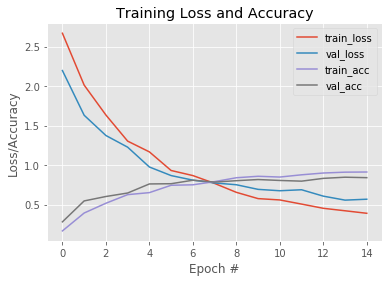

Train on 1020 samples, validate on 340 samples
Epoch 1/15
1020/1020 [==============================] - 4s 4ms/sample - loss: 1.9491 - acc: 0.4765 - val_loss: 0.5283 - val_acc: 0.8382
Epoch 2/15
1020/1020 [==============================] - 3s 3ms/sample - loss: 0.4216 - acc: 0.8745 - val_loss: 0.3044 - val_acc: 0.9029
Epoch 3/15
1020/1020 [==============================] - 3s 3ms/sample - loss: 0.0850 - acc: 0.9784 - val_loss: 0.3156 - val_acc: 0.9088
Epoch 4/15
1020/1020 [==============================] - 3s 3ms/sample - loss: 0.1304 - acc: 0.9647 - val_loss: 0.8197 - val_acc: 0.7471
Epoch 5/15
1020/1020 [==============================] - 3s 3ms/sample - loss: 0.0850 - acc: 0.9784 - val_loss: 0.2518 - val_acc: 0.9206
Epoch 6/15
1020/1020 [==============================] - 3s 3ms/sample - loss: 0.0138 - acc: 0.9980 - val_loss: 0.2618 - val_acc: 0.9235
Epoch 7/15
1020/1020 [==============================] - 3s 3ms/sample - loss: 0.0056 - acc: 1.0000 - val_loss: 0.2723 - val_acc: 0.9206
E

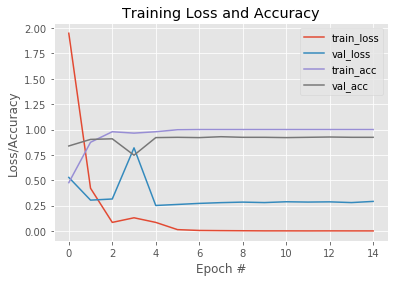

Epoch 1/15
32/32 [==============================] - 4s 136ms/step - loss: 2.9803 - acc: 0.1353 - val_loss: 2.7838 - val_acc: 0.1029
Epoch 2/15
32/32 [==============================] - 4s 127ms/step - loss: 1.6242 - acc: 0.4902 - val_loss: 0.3494 - val_acc: 0.8912
Epoch 3/15
32/32 [==============================] - 4s 128ms/step - loss: 0.3398 - acc: 0.8824 - val_loss: 0.2617 - val_acc: 0.9265
Epoch 4/15
32/32 [==============================] - 4s 127ms/step - loss: 0.1429 - acc: 0.9627 - val_loss: 0.2228 - val_acc: 0.9412
Epoch 5/15
32/32 [==============================] - 4s 128ms/step - loss: 0.1574 - acc: 0.9608 - val_loss: 0.2626 - val_acc: 0.9235
Epoch 6/15
32/32 [==============================] - 4s 126ms/step - loss: 0.0452 - acc: 0.9882 - val_loss: 0.2402 - val_acc: 0.9382
Epoch 7/15
32/32 [==============================] - 4s 129ms/step - loss: 0.0856 - acc: 0.9696 - val_loss: 0.2138 - val_acc: 0.9500
Epoch 8/15
32/32 [==============================] - 4s 128ms/step - loss: 0.

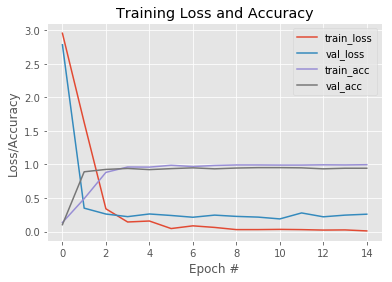

In [3]:
from google.colab import drive 
 
drive.mount('/content/gdrive')
!unzip "/content/gdrive/My Drive/miscellaneous/data1-2.h5.zip"

import tensorflow as tf
import h5py
import numpy as np
import matplotlib.pyplot as plt

def loadDataH5():
  
  with h5py.File('data1.h5','r') as hf:
    trainX = np.array(hf.get('trainX')) 
    trainY = np.array(hf.get('trainY')) 
    valX = np.array(hf.get('valX')) 
    valY = np.array(hf.get('valY')) 
    print (trainX.shape,trainY.shape) 
    print (valX.shape,valY.shape)
    
    return trainX, trainY, valX, valY

# loading the train and test data
trainX, trainY, testX, testY = loadDataH5()

# taking the pre-trained network
vggModel = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# freezing the weights
vggModel.trainable = False

NUM_EPOCHS = 15

model = tf.keras.models.Sequential()
model.add(vggModel)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(17, activation='softmax'))

print (model.summary())

# very small learning rate to allow weights to be refined at low rate
opt = tf.keras.optimizers.SGD(lr=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

H = model.fit(trainX, trainY, epochs=NUM_EPOCHS, batch_size=32, validation_data=(testX, testY))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# unfreezing the network
vggModel.trainable = True
trainableFlag = False

for layer in vggModel.layers:
  
  # allow all layers from the block4_conv1 forward to be trainable
  if layer.name == 'block4_conv1':
    trainableFlag = True
    
  layer.trainable = trainableFlag
  
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

H = model.fit(trainX, trainY, epochs=NUM_EPOCHS, batch_size=32, validation_data=(testX, testY)) 

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


# Adding Data Augmentation to the fine-tuning process

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
  
# data augmentation for training data
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

train_generator = trainDataGenerator.flow(
  trainX,
  trainY,
  batch_size=32)

# data augmentation for training data for testing data, which is empty as data for validation is already scaled and no changes are needed.
valDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator()

validation_generator = valDataGenerator.flow(
  testX,
  testY,
  batch_size=32)

H = model.fit_generator(train_generator,
       steps_per_epoch= 1020 // 32,
        epochs=NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=340 // 32                       
       )

# plot the training loss and accuracy for the fine tuned network with data augmentation
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()